In [11]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# tf.enable_eager_execution()


from tensorflow import feature_column
from tensorflow.keras import layers
# tf.disable_v2_behavior()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from patsy import dmatrices

%matplotlib inline

In [12]:
dataframe = pd.read_csv("doginfo.csv")
dataframe.head()

,kindNum,neuterYn,sexCd,weight,noticeDays,age2,processState
0,128.0,N,F,7.46,10,12,0
1,114.0,N,M,7.00,14,1,1
2,114.0,U,M,4.50,11,2,0
3,67.0,N,M,10.00,8,1,0
4,114.0,N,M,6.00,8,4,0


In [13]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22792 entries, 0 to 22791
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   kindNum       22777 non-null  float64
 1   neuterYn      22792 non-null  object 
 2   sexCd         22792 non-null  object 
 3   weight        22792 non-null  float64
 4   noticeDays    22792 non-null  int64  
 5   age2          22792 non-null  int64  
 6   processState  22792 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.2+ MB


In [14]:
dataframe.isnull().sum()

kindNum         15
neuterYn         0
sexCd            0
weight           0
noticeDays       0
age2             0
processState     0
dtype: int64

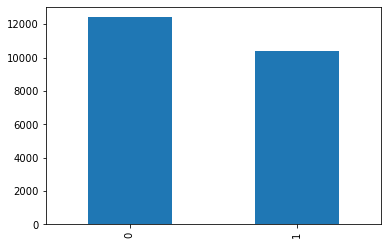

In [15]:
dataframe['processState'].value_counts().plot(kind='bar')
plt.show()

In [16]:
category_feature = [ col for col in dataframe.columns if dataframe[col].dtypes == "object"]
category_feature

['neuterYn', 'sexCd']

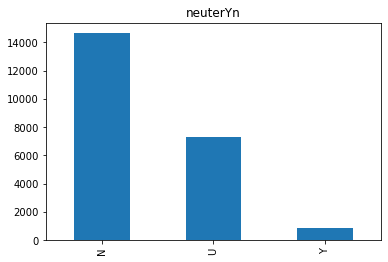

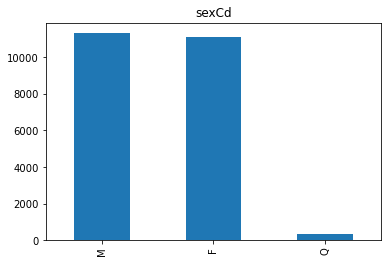

In [17]:
for col in category_feature: 
    dataframe[col].value_counts().plot(kind='bar') 
    plt.title(col) 
    plt.show()

In [18]:
y, X = dmatrices('processState ~ + kindNum + neuterYn + sexCd + weight + noticeDays + age2', dataframe, return_type="dataframe")
print(y)

y = np.ravel(y)
print(y)

       processState
0               0.0
1               1.0
2               0.0
3               0.0
4               0.0
...             ...
22787           1.0
22788           1.0
22789           1.0
22790           0.0
22791           0.0

[22777 rows x 1 columns]
[0. 1. 0. ... 1. 0. 0.]


In [22]:
RegModel = LogisticRegression()
RegModel = RegModel.fit(X, y)
LR_result = RegModel.fit_transform(X, y)
RegModel.score(X, y)

dfCoef= pd.DataFrame({'coef': X.columns, 'weight': RegModel.coef_[0]})
print(dfCoef)

C:\Users\yunji\anaconda3\envs\dbswls\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AttributeError: 'LogisticRegression' object has no attribute 'fit_transform'